<P> <B> <font color=red size="4"> 4.Spectral Clustering</Font></B> </P>

<b><font color=green size="4">Spectral Clustering on the Iris Dataset:</font></b>

Spectral Clustering is a clustering technique that uses the eigenvalues of a similarity matrix to perform dimensionality reduction before applying a clustering algorithm (like KMeans). It’s particularly effective for data that isn’t well-separated linearly.

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import SpectralClustering
from sklearn.metrics import (
    silhouette_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Ground truth


<b><font color=green size="4">Key Parameters in Spectral Clustering:</font></b>

<b>1.n_clusters:</b>Number of clusters to form (e.g., 3 for the Iris dataset).</ol>

<b>2.affinity:</b>
<ol>
<b>a)'rbf' (Radial Basis Function):</b> Creates a similarity matrix using a Gaussian (RBF) kernel.
    
<b>b)'nearest_neighbors':</b> Uses a k-nearest neighbor graph for similarity.</li></ol>
<b>3.assign_labels:</b>
<ol><b>a)'kmeans':</b> Uses KMeans to assign labels to the clusters.
    
<b>b)'discretize':</b> Uses a more deterministic approach for label assignment.</li></ol>

In [10]:
# Apply Spectral Clustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
y_spectral = sc.fit_predict(X)

C:\Users\USER\.conda\envs\NEW_38\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\USER\.conda\envs\NEW_38\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
# Performance Metrics
silhouette_avg = silhouette_score(X, y_spectral)
calinski_harabasz = calinski_harabasz_score(X, y_spectral)
davies_bouldin = davies_bouldin_score(X, y_spectral)
adjusted_rand = adjusted_rand_score(y, y_spectral)
normalized_mutual_info = normalized_mutual_info_score(y, y_spectral)
homogeneity = homogeneity_score(y, y_spectral)
completeness = completeness_score(y, y_spectral)
v_measure = v_measure_score(y, y_spectral)

In [12]:
# Display the results
results = pd.DataFrame({
    "Metric": [
        "Silhouette Coefficient",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index",
        "Adjusted Rand Index",
        "Normalized Mutual Information",
        "Homogeneity",
        "Completeness",
        "V-Measure"
    ],
    "Score": [
        silhouette_avg,
        davies_bouldin,
        calinski_harabasz,
        adjusted_rand,
        normalized_mutual_info,
        homogeneity,
        completeness,
        v_measure
    ]
})

print(results)

                          Metric       Score
0         Silhouette Coefficient    0.554161
1           Davies-Bouldin Index    0.658444
2        Calinski-Harabasz Index  556.879542
3            Adjusted Rand Index    0.759199
4  Normalized Mutual Information    0.805694
5                    Homogeneity    0.795982
6                   Completeness    0.815646
7                      V-Measure    0.805694


In [13]:
# Reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)



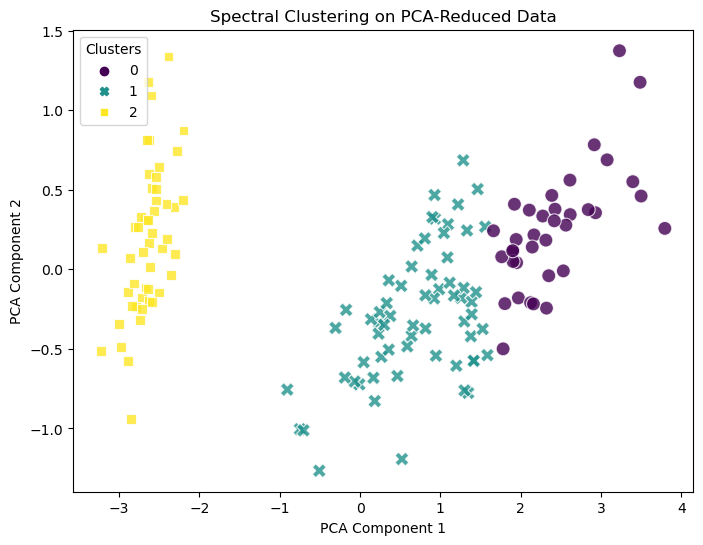

In [14]:
# Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=y_spectral, palette='viridis', style=y_spectral, s=100, alpha=0.8
)
plt.title('Spectral Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Clusters')
plt.show()